In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("Задания/Datasets/babyboomdat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['TimeOfBirth', 'Sex', 'Weight', 'MinutesAfterMidnight']
print(df.shape)
df.head(20)

(44, 4)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_10544/4206371257.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/babyboomdat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,TimeOfBirth,Sex,Weight,MinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TimeOfBirth           44 non-null     int64
 1   Sex                   44 non-null     int64
 2   Weight                44 non-null     int64
 3   MinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [4]:
df.isnull().sum()

TimeOfBirth             0
Sex                     0
Weight                  0
MinutesAfterMidnight    0
dtype: int64

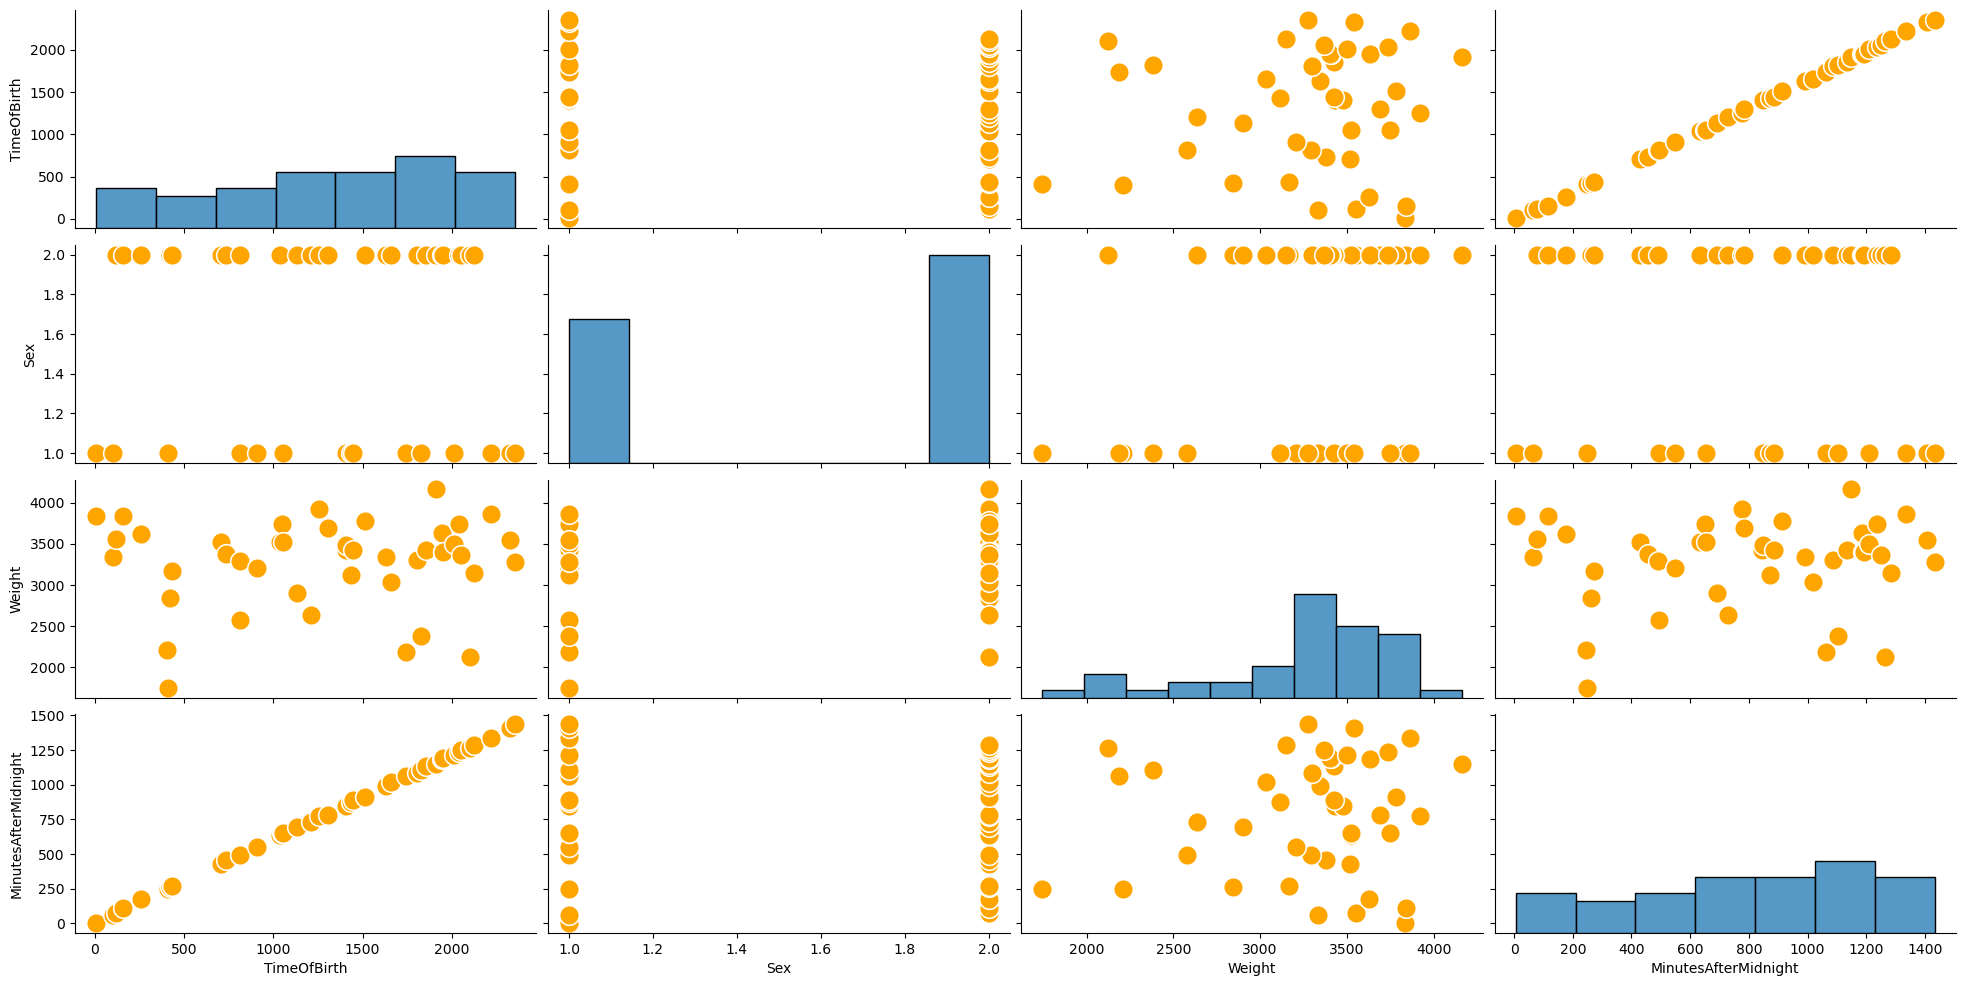

In [5]:
sns.pairplot(df, plot_kws={'color': 'orange', 's': 200}, aspect = 2)  
# aspect — соотношение ширины к высоте
# s — размер точки
plt.show()

<Axes: >

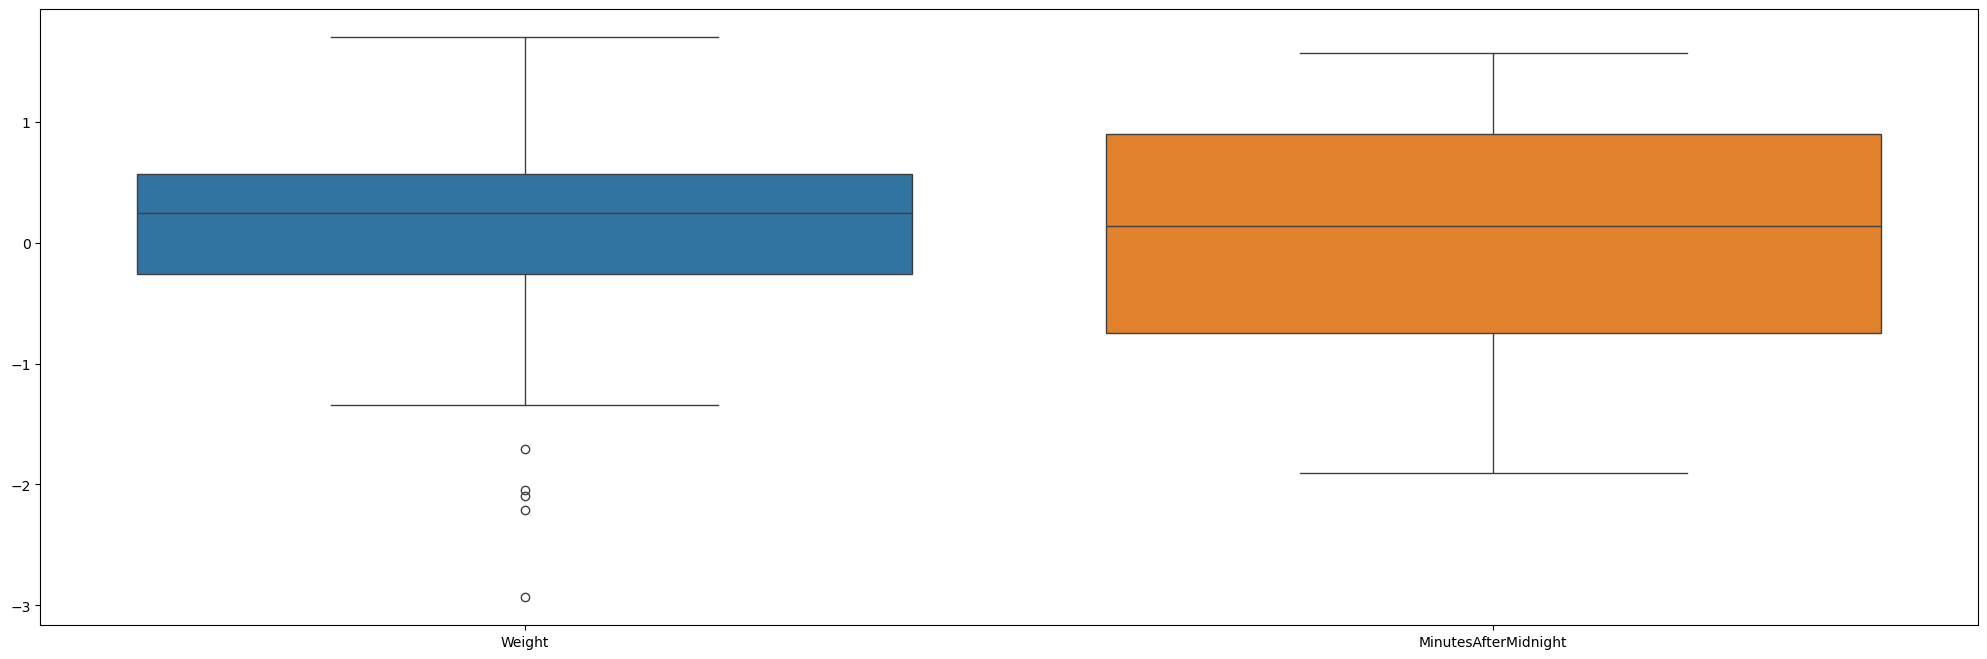

In [6]:
# Определяем колонки, которые хотим исключить из анализа
feature_columnas = ['TimeOfBirth', 'Sex']

# Создаем копию исходного DataFrame
data = df.copy()

# Удаляем указанные колонки из данных
data = data.drop(feature_columnas, axis=1)

# Инициализируем стандартный скейлер для нормализации данных
scaler = StandardScaler()

# Применяем скейлер к данным и сохраняем результат
data_scaled = scaler.fit_transform(data)

# Преобразуем нормализованные данные обратно в DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Настраиваем размеры графика для улучшения видимости
plt.figure(1, figsize=(25, 8))  # Увеличиваем высоту графика
# Создаем коробчатую диаграмму для нормализованных данных
sns.boxplot(data_scaled)


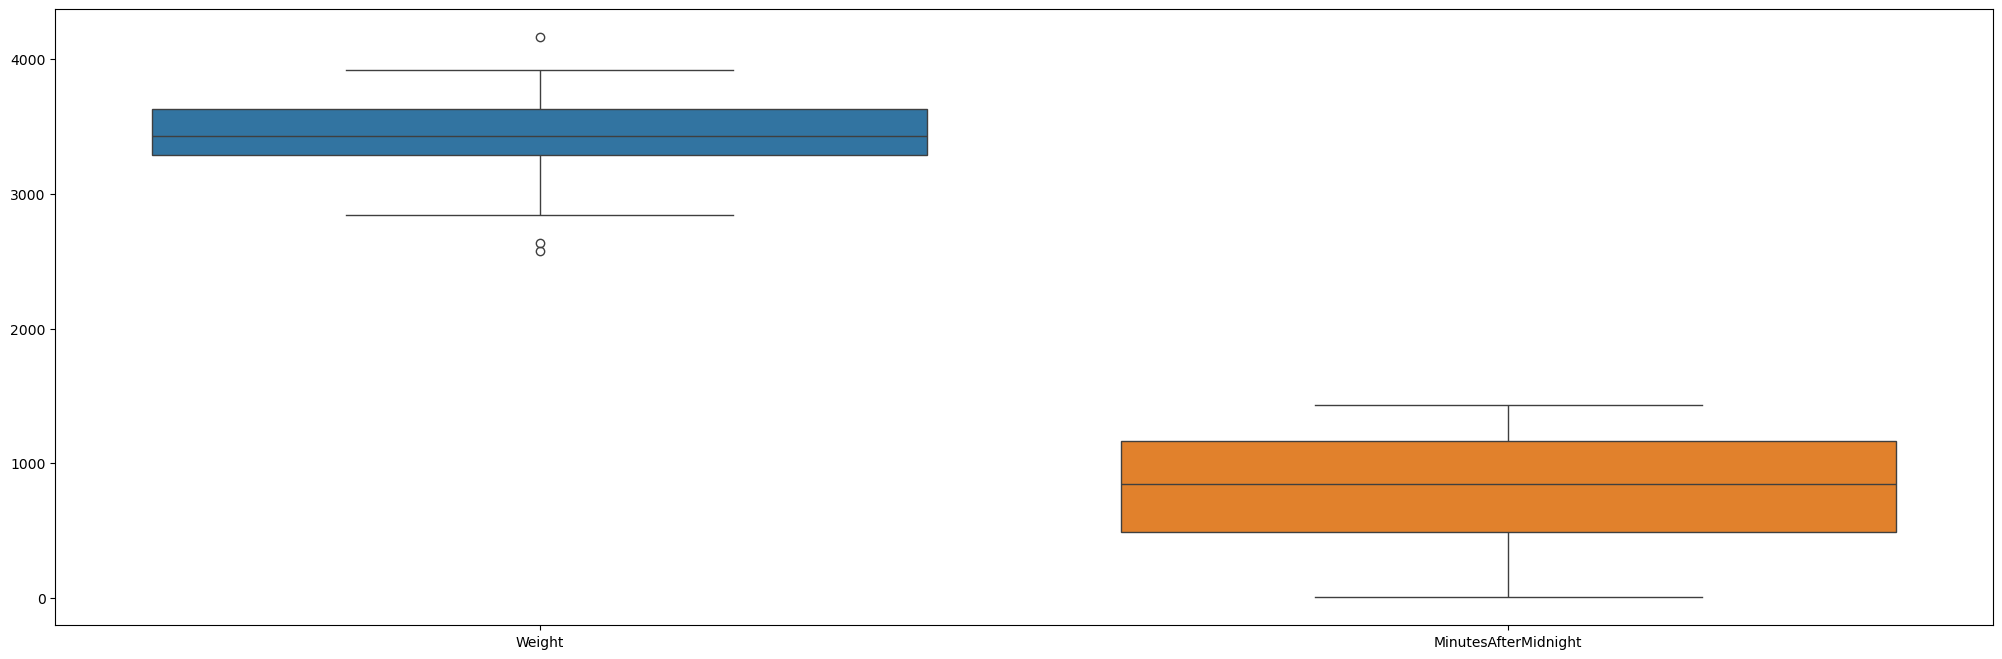

In [7]:
# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Преобразование обратно в DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Функция для удаления выбросов с помощью IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Удаление выбросов
data_no_outliers = remove_outliers_iqr(data)

# Построение boxplot без выбросов
plt.figure(figsize=(25, 8))
sns.boxplot(data=data_no_outliers)
plt.show()

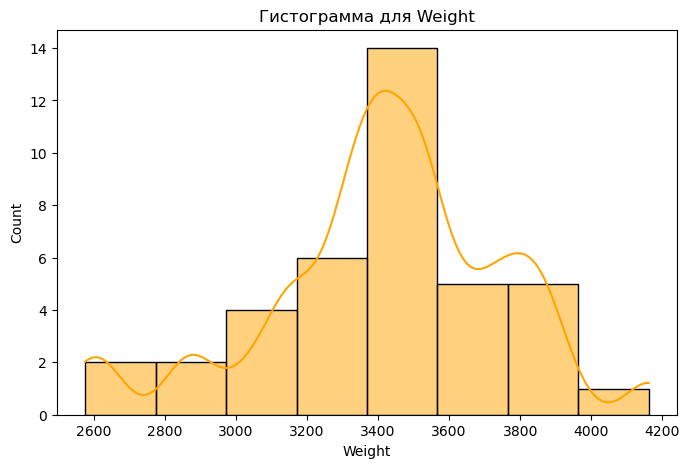

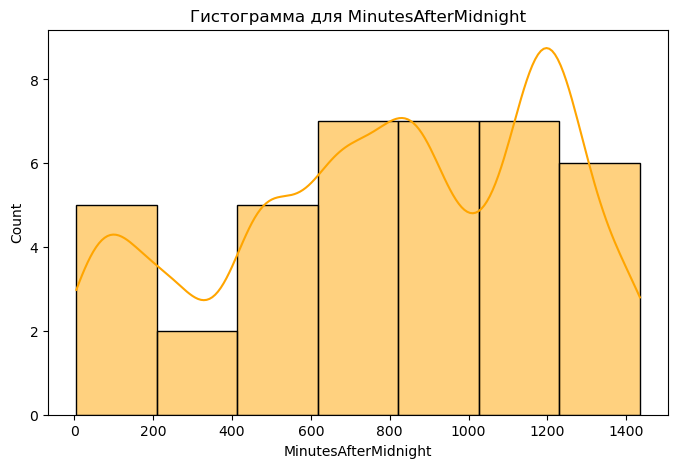

In [13]:
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_no_outliers[column], kde=True, color='orange',kde_kws={'bw_adjust': 0.4})  
    # kde=True добавляет линию плотности
    # dw_adjust настраивает уровень сглаживания kde
    plt.title(f'Гистограмма для {column}')
    plt.show()

    Что касается видов распределения:
- ['Weight', 'MinutesAfterMidnight']
- 'Weight' имеет нормальное распределение
- 'MinutesAfterMidnight' имеет многовершинное распределение которое похоже на нормальноее, если не считать значения близкие к нулю


In [9]:
print(df.describe())

       TimeOfBirth        Sex       Weight  MinutesAfterMidnight
count    44.000000  44.000000    44.000000             44.000000
mean   1296.000000   1.590909  3275.954545            788.727273
std     690.704561   0.497350   528.032458            416.066931
min       5.000000   1.000000  1745.000000              5.000000
25%     792.750000   1.000000  3141.500000            482.750000
50%    1406.500000   2.000000  3404.000000            846.500000
75%    1918.500000   2.000000  3571.750000           1158.500000
max    2355.000000   2.000000  4162.000000           1435.000000


# Статистические характеристики

1. **Выборочное среднее (Mean)**:
   $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
   - Это среднее значение выборки, которое вычисляется как сумма всех наблюдений, деленная на их количество. Оно представляет собой центр данных.

2. **Выборочная дисперсия (Sample Variance)**:
   $$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$
   - Дисперсия измеряет, насколько сильно данные отклоняются от своего среднего значения. Чем больше дисперсия, тем больше разброс значений.

3. **Стандартное отклонение (Standard Deviation)**:
   $$s = \sqrt{s^2}$$
   - Это квадратный корень из дисперсии, который также измеряет разброс данных, но в тех же единицах, что и сами данные. Оно помогает понять, насколько значения выборки в среднем отклоняются от среднего.

4. **Медиана (Median)**:
   - Медиана — это значение, которое делит отсортированный набор данных на две равные части. Если количество наблюдений четное, то медианой будет среднее двух центральных значений. Она менее чувствительна к выбросам по сравнению со средним.

5. **1-й и 3-й квартили (Q1 и Q3)**:
   - $Q1$ — это медиана первой половины данных (25-й процентиль), указывающая на значение, ниже которого находится 25% наблюдений.
   - $Q3$ — медиана второй половины данных (75-й процентиль), указывающая на значение, ниже которого находится 75% наблюдений. Квартильный размах (IQR) определяется как $IQR = Q3 - Q1$ и помогает выявлять выбросы.

6. **Попарные коэффициенты корреляции (Pairwise Correlation Coefficients)**:
   $$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}$$
   - Этот коэффициент измеряет степень линейной связи между двумя переменными. Значения колеблются от -1 до 1, где 1 означает полную положительную корреляцию, -1 — полную отрицательную, а 0 — отсутствие корреляции.

In [10]:
# 1. Выборочное среднее
mean = data.mean()

# 2. Выборочная дисперсия
sample_variance = data.var(ddof=1)  # ddof=1 для выборочной дисперсии

# 3. Стандартное отклонение
standard_deviation = data.std(ddof=1)  # ddof=1 для выборочного стандартного отклонения

# 4. Медиана
median = data.median()

# 5. 1-й и 3-й квартили
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# 6. Попарные коэффициенты корреляции
correlation = data.corr()

# Вывод результатов
print("Выборочное среднее:\n", mean)
print("\nВыборочная дисперсия:\n", sample_variance)
print("\nСтандартное отклонение:\n", standard_deviation)
print("\nМедиана:\n", median)
print("\n1-й квартили (Q1):\n", Q1)
print("\n3-й квартили (Q3):\n", Q3)
print("\nПопарные коэффициенты корреляции:\n", correlation)

Выборочное среднее:
 Weight                  3275.954545
MinutesAfterMidnight     788.727273
dtype: float64

Выборочная дисперсия:
 Weight                  278818.276956
MinutesAfterMidnight    173111.691332
dtype: float64

Стандартное отклонение:
 Weight                  528.032458
MinutesAfterMidnight    416.066931
dtype: float64

Медиана:
 Weight                  3404.0
MinutesAfterMidnight     846.5
dtype: float64

1-й квартили (Q1):
 Weight                  3141.50
MinutesAfterMidnight     482.75
Name: 0.25, dtype: float64

3-й квартили (Q3):
 Weight                  3571.75
MinutesAfterMidnight    1158.50
Name: 0.75, dtype: float64

Попарные коэффициенты корреляции:
                         Weight  MinutesAfterMidnight
Weight                1.000000              0.079616
MinutesAfterMidnight  0.079616              1.000000
